Loading Tesla stock data

In [1]:
import yfinance as yf

In [5]:
# Download historical data for a stock
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
# Display the downloaded data
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Extracting tesla revenue data using WebScraping

In [6]:
import requests
from bs4 import BeautifulSoup

In [33]:
url = "https://companiesmarketcap.com/eur/gamestop/revenue/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

rows = soup.find_all("tr")
i = 2
revenue_mock = []
for row in rows:
    cells = row.find_all('td')
    for cell in cells:
        revenue_mock.append(cell.text.strip())

Formatting revenue data for dashboard

In [34]:
revenue = []
for i in range(1, len(revenue_mock), 3):
    revenue.append(revenue_mock[i])
print(revenue)

['€4.83 B', '€4.76 B', '€5.52 B', '€5.30 B', '€4.13 B', '€5.77 B', '€6.85 B', '€7.68 B', '€8.18 B', '€8.56 B', '€7.64 B', '€6.54 B', '€6.71 B', '€7.35 B', '€7.12 B', '€6.33 B', '€6.29 B', '€4.85 B', '€4.03 B', '€2.60 B', '€1.35 B', '€1.25 B', '€1.29 B', '€1.26 B', 'AMC EntertainmentAMC']


In [35]:
del revenue[-1]
print(revenue)

['€4.83 B', '€4.76 B', '€5.52 B', '€5.30 B', '€4.13 B', '€5.77 B', '€6.85 B', '€7.68 B', '€8.18 B', '€8.56 B', '€7.64 B', '€6.54 B', '€6.71 B', '€7.35 B', '€7.12 B', '€6.33 B', '€6.29 B', '€4.85 B', '€4.03 B', '€2.60 B', '€1.35 B', '€1.25 B', '€1.29 B', '€1.26 B']


In [36]:
for i in range(0, len(revenue)):
    if type(revenue[i]) == str:
      revenue[i] = float(revenue[i].replace("€","").replace("B", "").strip())
    revenue[i] = revenue[i] * 1000000000
    print(revenue[i])

4830000000.0
4760000000.0
5520000000.0
5300000000.0
4130000000.0
5770000000.0
6850000000.0
7680000000.0
8180000000.0
8560000000.000001
7640000000.0
6540000000.0
6710000000.0
7350000000.0
7120000000.0
6330000000.0
6290000000.0
4850000000.0
4030000000.0000005
2600000000.0
1350000000.0
1250000000.0
1290000000.0
1260000000.0


In [32]:
tesla_revenue = revenue.copy()

In [37]:
gamestop_revenue = revenue.copy()

Load gamestop data

In [30]:
# Download historical data for a stock
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
# Display the downloaded data
gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Dashboarding tesla

In [39]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


In [40]:
import mplfinance as mpf

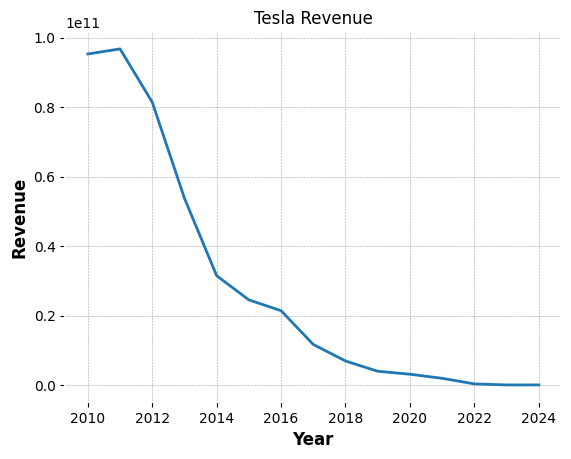

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


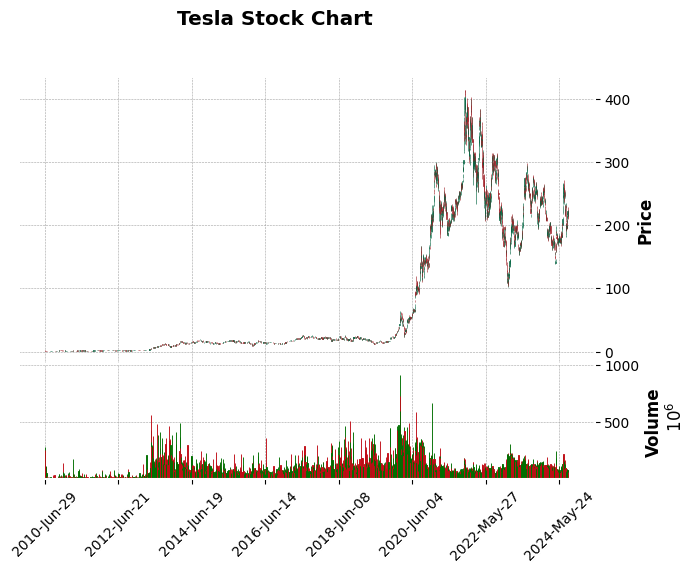

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(2010, 2025),tesla_revenue)
plt.title("Tesla Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

mpf.plot(tesla_data, type='candle', style='charles', volume=True, title='Tesla Stock Chart', ylabel='Price', ylabel_lower='Volume')

Gamestop dashboard

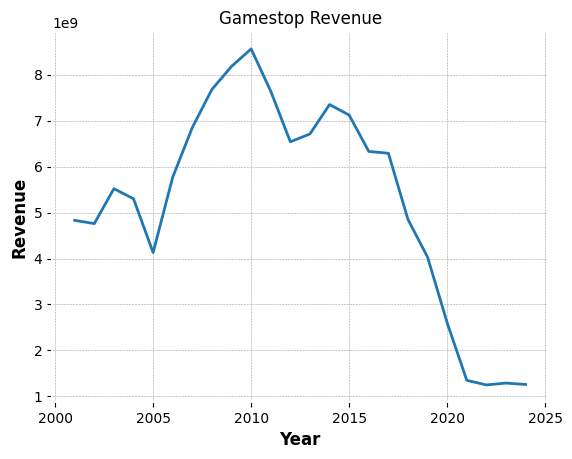

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


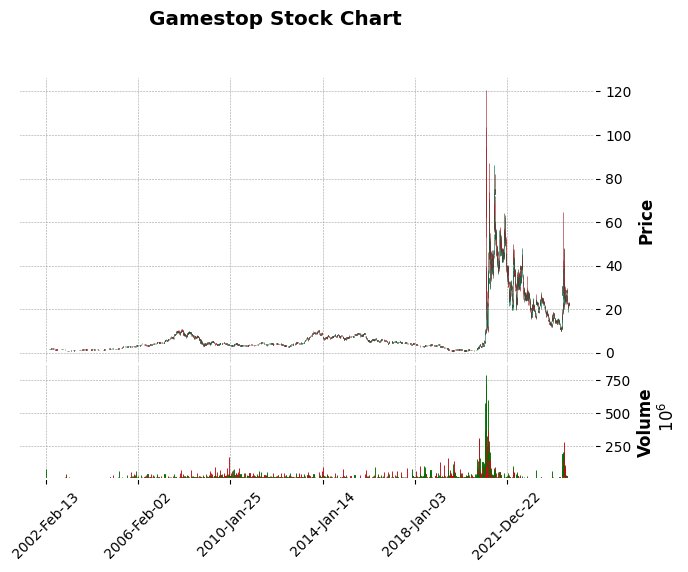

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(2001, 2025),gamestop_revenue)
plt.title("Gamestop Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

mpf.plot(gamestop_data, type='candle', style='charles', volume=True, title='Gamestop Stock Chart', ylabel='Price', ylabel_lower='Volume')